## Lab 2

In [224]:
import pandas as pd
import numpy as np

In [225]:
data = pd.read_csv('./data/movie_statistic_dataset.csv')
data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


In [226]:
data['production_date'] = pd.to_datetime(data['production_date'])
data['year'] = data['production_date'].dt.year
data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,2019
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754,2018


In [227]:
data.keys()

Index(['movie_title', 'production_date', 'genres', 'runtime_minutes',
       'director_name', 'director_professions', 'director_birthYear',
       'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes',
       'approval_Index', 'Production budget $', 'Domestic gross $',
       'Worldwide gross $', 'year'],
      dtype='object')

In [228]:
genre_cols = data['genres'].str.split(',', expand=True)
genre_cols.columns = [f'genre {i+1}' for i in range(genre_cols.shape[1])]

data = pd.concat([data, genre_cols], axis=1)
data.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,genre 1,genre 2,genre 3
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,Action,Adventure,Fantasy
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,2019,Action,Adventure,Drama
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,Action,Adventure,Fantasy
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,Action,Adventure,Sci-Fi
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754,2018,Action,Adventure,Sci-Fi


In [229]:
genres_ = list(data['genre 1']) + list(data['genre 2']) + list(data['genre 3'])

genres = set(genres_)
len(genres)

25

In [230]:
data.shape

(4380, 18)

In [231]:
data = data.drop(['movie_title', 'production_date', 'genres', 'director_professions', 'director_birthYear', 'director_deathYear'], axis=1)
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,genre 1,genre 2,genre 3
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,Action,Adventure,Fantasy
1,181.0,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755,2019,Action,Adventure,Drama
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,Action,Adventure,Fantasy
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,Action,Adventure,Sci-Fi
4,149.0,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754,2018,Action,Adventure,Sci-Fi


In [232]:
data = data[data['director_name'] != '-']

In [233]:
numerical_cols = ['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $', 'Worldwide gross $', 'year']
categorical_cols = ['director_name', 'genre 1', 'genre 2', 'genre 3']

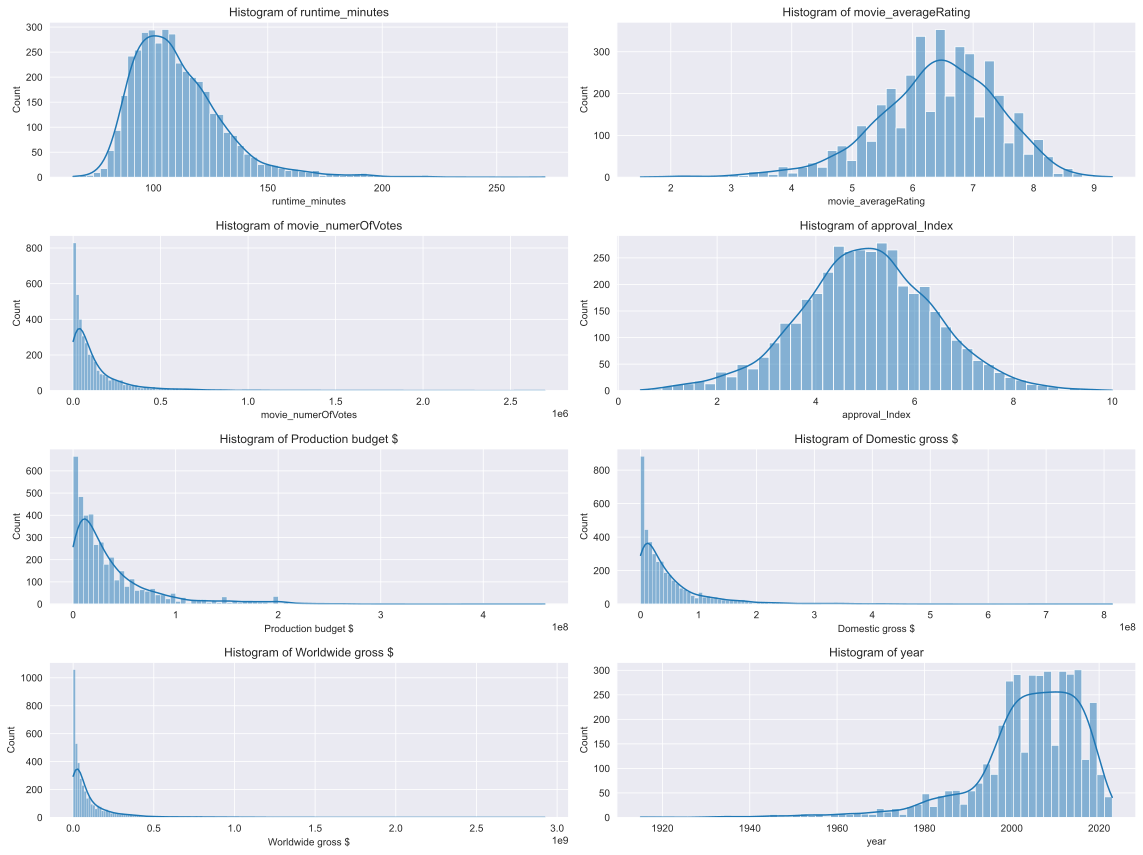

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Histograms for numerical variables
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 2, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

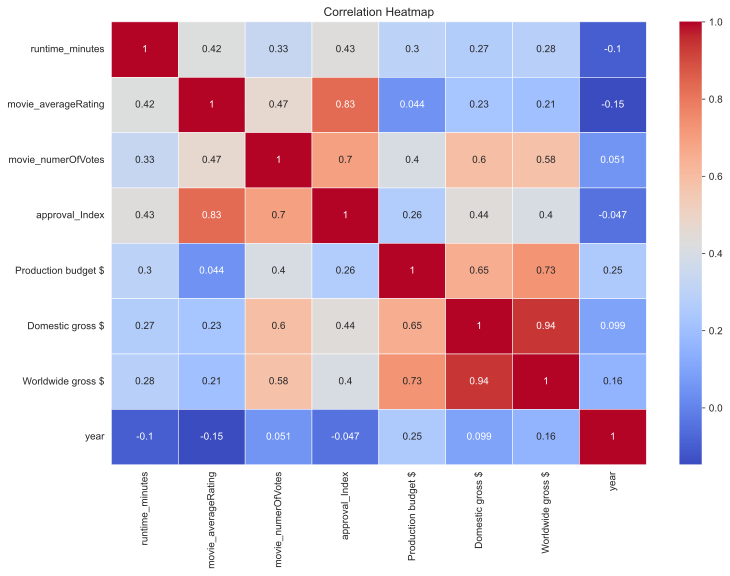

In [235]:
corr_matrix = data[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap')
plt.show()

In [236]:
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,genre 1,genre 2,genre 3
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,Action,Adventure,Fantasy
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,Action,Adventure,Fantasy
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,Action,Adventure,Sci-Fi
5,120.0,Zack Snyder,6.1,456977.0,5.717212,300000000,229024295,655945209,2017,Action,Adventure,Fantasy
6,148.0,Sam Mendes,6.8,445461.0,6.375644,300000000,200074175,879077344,2015,Action,Adventure,Thriller


In [237]:
data = data[data['genre 1'] != '\\N']

In [238]:
def genre_indicator(row, genre):
    return int(genre in [row['genre 1'], row['genre 2'], row['genre 3']])

# Iterate through the genres list and create new columns
for genre in genres:
    data[genre] = data.apply(lambda row: genre_indicator(row, genre), axis=1)

In [239]:
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,genre 1,...,Biography,Thriller,Sci-Fi,Documentary,Music,Family,Western,Mystery,Drama,Adventure
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,Action,...,0,0,0,0,0,0,0,0,0,1
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,Action,...,0,0,0,0,0,0,0,0,0,1
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,Action,...,0,0,1,0,0,0,0,0,0,1
5,120.0,Zack Snyder,6.1,456977.0,5.717212,300000000,229024295,655945209,2017,Action,...,0,0,0,0,0,0,0,0,0,1
6,148.0,Sam Mendes,6.8,445461.0,6.375644,300000000,200074175,879077344,2015,Action,...,0,1,0,0,0,0,0,0,0,1


In [240]:
data = data.drop(['genre 1', 'genre 2', 'genre 3', None, '\\N'], axis=1)
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,Action,...,Biography,Thriller,Sci-Fi,Documentary,Music,Family,Western,Mystery,Drama,Adventure
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,1,...,0,0,0,0,0,0,0,0,0,1
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,1,...,0,0,0,0,0,0,0,0,0,1
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,1,...,0,0,1,0,0,0,0,0,0,1
5,120.0,Zack Snyder,6.1,456977.0,5.717212,300000000,229024295,655945209,2017,1,...,0,0,0,0,0,0,0,0,0,1
6,148.0,Sam Mendes,6.8,445461.0,6.375644,300000000,200074175,879077344,2015,1,...,0,1,0,0,0,0,0,0,0,1


In [241]:
# data['approval_Index'] = data['approval_Index'].round(2)
# data['Production budget $'] = (data['Production budget $'] / 1000000).round(2)

In [242]:
data.describe()

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,Action,War,...,Biography,Thriller,Sci-Fi,Documentary,Music,Family,Western,Mystery,Drama,Adventure
count,4053.000000,4053.000000,4.053000e+03,4053.000000,4.053000e+03,4.053000e+03,4.053000e+03,4053.00000,4053.000000,4053.000000,...,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000,4053.000000
mean,110.434246,6.400222,1.342616e+05,5.027976,3.770507e+07,5.007030e+07,1.078765e+08,2003.87170,0.283000,0.020725,...,0.079941,0.157908,0.088083,0.011843,0.034296,0.060202,0.010116,0.096965,0.524550,0.203553
std,20.104759,1.015663,2.125648e+05,1.360631,4.452829e+07,7.090141e+07,1.863933e+08,13.03641,0.450512,0.142481,...,0.271235,0.364699,0.283450,0.108193,0.182010,0.237891,0.100080,0.295947,0.499459,0.402690
min,65.000000,1.500000,5.000000e+00,0.449597,5.000000e+04,2.640000e+02,4.230000e+02,1915.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.000000,5.800000,2.147300e+04,4.184392,1.000000e+07,8.355815e+06,1.280119e+07,1999.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,107.000000,6.500000,6.397300e+04,5.023304,2.250000e+07,2.729828e+07,4.249351e+07,2006.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,120.000000,7.100000,1.552290e+05,5.921866,5.000000e+07,6.173719e+07,1.211000e+08,2013.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,271.000000,9.300000,2.695887e+06,10.000000,4.600000e+08,8.141151e+08,2.923706e+09,2023.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [243]:
import tensorflow as tf
from tensorflow.keras import layers
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [244]:
le = LabelEncoder()
le.fit(data['director_name'])
data['director_name_e'] = le.transform(data['director_name'])
data.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,year,Action,...,Thriller,Sci-Fi,Documentary,Music,Family,Western,Mystery,Drama,Adventure,director_name_e
0,192.0,James Cameron,7.8,277543.0,7.061101,460000000,667830256,2265935552,2022,1,...,0,0,0,0,0,0,0,0,1,664
2,137.0,Rob Marshall,6.6,533763.0,6.272064,379000000,241071802,1045713802,2011,1,...,0,0,0,0,0,0,0,0,1,1444
3,141.0,Joss Whedon,7.3,870573.0,7.214013,365000000,459005868,1395316979,2015,1,...,0,1,0,0,0,0,0,0,1,899
5,120.0,Zack Snyder,6.1,456977.0,5.717212,300000000,229024295,655945209,2017,1,...,0,0,0,0,0,0,0,0,1,1828
6,148.0,Sam Mendes,6.8,445461.0,6.375644,300000000,200074175,879077344,2015,1,...,1,0,0,0,0,0,0,0,1,1530


In [245]:
data['runtime_minutes'] = (data['runtime_minutes'] - data['runtime_minutes'].mean()) / data['runtime_minutes'].std()
data['approval_Index'] = (data['approval_Index'] - data['approval_Index'].mean()) / data['approval_Index'].std()
data['Production budget $'] = (data['Production budget $'] - data['Production budget $'].mean()) / data['Production budget $'].std()
data['Worldwide gross $'] = (data['Worldwide gross $'] - data['Worldwide gross $'].mean()) / data['Worldwide gross $'].std()

In [264]:
# X = data[['runtime_minutes', 'approval_Index', 'Production budget $', 'Action', 'War', 'Musical', 'Fantasy', 'Crime', 'Romance', 'News', 'Film-Noir', 'Horror', 'Animation', 'Comedy', 'History', 'Sport', 'Biography', 'Thriller', 'Sci-Fi', 'Documentary', 'Music', 'Family', 'Western', 'Mystery', 'Drama', 'Adventure']]
X = data[['runtime_minutes', 'approval_Index', 'Production budget $', 'year', 'director_name_e']]
# Convert DataFrame into np array
X = np.asarray(X)
y = data['Worldwide gross $']
# Convert DataFrame into np array
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [265]:
X_train.shape

(3242, 5)

In [270]:
batched_model = tf.keras.Sequential([
    layers.InputLayer(shape=(5,)),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

In [271]:
batched_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [272]:
batched_history = batched_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Epoch 1/100
26/26 - 2s - 83ms/step - accuracy: 0.0000e+00 - loss: 1.2132 - val_accuracy: 0.0000e+00 - val_loss: 1.5898
Epoch 2/100
26/26 - 2s - 74ms/step - accuracy: 0.0000e+00 - loss: 0.7333 - val_accuracy: 0.0000e+00 - val_loss: 8.5584
Epoch 3/100
26/26 - 2s - 65ms/step - accuracy: 0.0000e+00 - loss: 0.5506 - val_accuracy: 0.0000e+00 - val_loss: 18.9178
Epoch 4/100
26/26 - 2s - 64ms/step - accuracy: 0.0000e+00 - loss: 0.4727 - val_accuracy: 0.0000e+00 - val_loss: 10.9959
Epoch 5/100
26/26 - 2s - 70ms/step - accuracy: 0.0000e+00 - loss: 0.4657 - val_accuracy: 0.0000e+00 - val_loss: 12.1006
Epoch 6/100
26/26 - 2s - 64ms/step - accuracy: 0.0000e+00 - loss: 0.4926 - val_accuracy: 0.0000e+00 - val_loss: 8.6883
Epoch 7/100
26/26 - 2s - 67ms/step - accuracy: 0.0000e+00 - loss: 0.4588 - val_accuracy: 0.0000e+00 - val_loss: 10.8091
Epoch 8/100
26/26 - 2s - 73ms/step - accuracy: 0.0000e+00 - loss: 0.4435 - val_accuracy: 0.0000e+00 - val_loss: 5.6610
Epoch 9/100
26/26 - 2s - 65ms/step - accurac

In [273]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

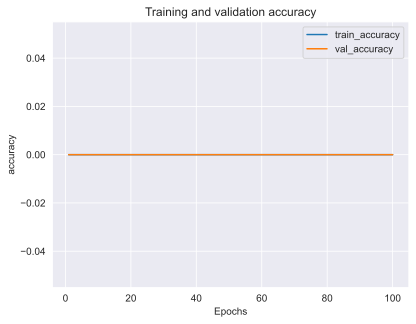

In [274]:
plot_metric(batched_history, 'accuracy')

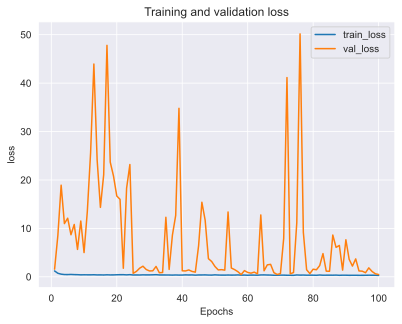

In [275]:
plot_metric(batched_history, 'loss')

In [276]:
dropout_model = tf.keras.Sequential([
    layers.InputLayer(shape=(5,)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

In [277]:
dropout_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [278]:
dropout_history = batched_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Epoch 1/100
26/26 - 2s - 68ms/step - accuracy: 0.0000e+00 - loss: 0.2932 - val_accuracy: 0.0000e+00 - val_loss: 0.7365
Epoch 2/100
26/26 - 2s - 65ms/step - accuracy: 0.0000e+00 - loss: 0.3188 - val_accuracy: 0.0000e+00 - val_loss: 0.7865
Epoch 3/100
26/26 - 2s - 59ms/step - accuracy: 0.0000e+00 - loss: 0.3242 - val_accuracy: 0.0000e+00 - val_loss: 3.6364
Epoch 4/100
26/26 - 2s - 63ms/step - accuracy: 0.0000e+00 - loss: 0.3531 - val_accuracy: 0.0000e+00 - val_loss: 1.3060
Epoch 5/100
26/26 - 2s - 61ms/step - accuracy: 0.0000e+00 - loss: 0.3168 - val_accuracy: 0.0000e+00 - val_loss: 6.9290
Epoch 6/100
26/26 - 2s - 62ms/step - accuracy: 0.0000e+00 - loss: 0.3082 - val_accuracy: 0.0000e+00 - val_loss: 8.4298
Epoch 7/100
26/26 - 2s - 63ms/step - accuracy: 0.0000e+00 - loss: 0.3387 - val_accuracy: 0.0000e+00 - val_loss: 1.4717
Epoch 8/100
26/26 - 2s - 62ms/step - accuracy: 0.0000e+00 - loss: 0.3212 - val_accuracy: 0.0000e+00 - val_loss: 8.9280
Epoch 9/100
26/26 - 2s - 60ms/step - accuracy: 0

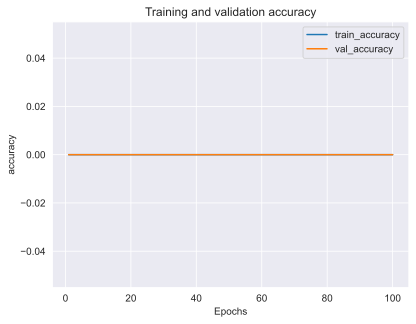

In [279]:
plot_metric(dropout_history, 'accuracy')

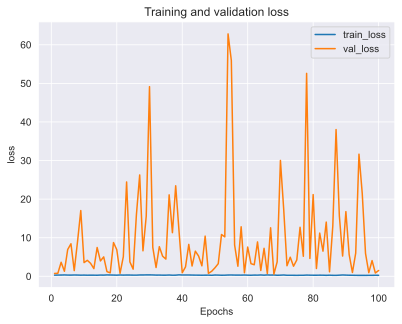

In [280]:
plot_metric(dropout_history, 'loss')

In [281]:
l1_model = tf.keras.Sequential([
    layers.InputLayer(shape=(5,)),
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    layers.Dense(1)
])

In [282]:
l1_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [283]:
l1_history = batched_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

Epoch 1/100
26/26 - 2s - 62ms/step - accuracy: 0.0000e+00 - loss: 0.2436 - val_accuracy: 0.0000e+00 - val_loss: 4.0350
Epoch 2/100
26/26 - 2s - 61ms/step - accuracy: 0.0000e+00 - loss: 0.2611 - val_accuracy: 0.0000e+00 - val_loss: 4.9008
Epoch 3/100
26/26 - 2s - 60ms/step - accuracy: 0.0000e+00 - loss: 0.2715 - val_accuracy: 0.0000e+00 - val_loss: 3.7642
Epoch 4/100
26/26 - 2s - 61ms/step - accuracy: 0.0000e+00 - loss: 0.2424 - val_accuracy: 0.0000e+00 - val_loss: 3.0720
Epoch 5/100
26/26 - 2s - 61ms/step - accuracy: 0.0000e+00 - loss: 0.2466 - val_accuracy: 0.0000e+00 - val_loss: 1.2250
Epoch 6/100
26/26 - 2s - 62ms/step - accuracy: 0.0000e+00 - loss: 0.2602 - val_accuracy: 0.0000e+00 - val_loss: 1.0354
Epoch 7/100
26/26 - 2s - 60ms/step - accuracy: 0.0000e+00 - loss: 0.2379 - val_accuracy: 0.0000e+00 - val_loss: 1.0339
Epoch 8/100
26/26 - 2s - 60ms/step - accuracy: 0.0000e+00 - loss: 0.2533 - val_accuracy: 0.0000e+00 - val_loss: 0.7588
Epoch 9/100
26/26 - 2s - 60ms/step - accuracy: 0

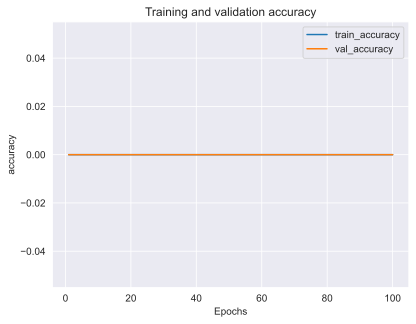

In [284]:
plot_metric(l1_history, 'accuracy')

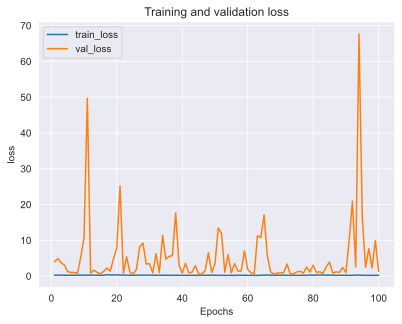

In [285]:
plot_metric(l1_history, 'loss')